
# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Run a local spark session to test your installation:

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [4]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)


#Create a New Database

In [5]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [6]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



# Upload Data to Working Directory

In [7]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

# Load Data to Spark Cluster

In [8]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [9]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [10]:

dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")


# Show data from Hive Table

In [11]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [12]:
# Task 1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 7")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [13]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


Task 2: Descriptive Ststistics

In [14]:
# Task 2.1: Basic statistics for "medv"
medv_stats = spark.sql("""
    SELECT
        AVG(medv) AS mean_medv,
        STDDEV(medv) AS stddev_medv,
        MIN(medv) AS min_medv,
        MAX(medv) AS max_medv
    FROM BostonH.bos_housing
""")
medv_stats.show()

# Task 2.2: Mean "rm"
mean_rm = spark.sql("SELECT AVG(rm) AS mean_rm FROM BostonH.bos_housing")
mean_rm.show()


+------------------+-----------------+--------+--------+
|         mean_medv|      stddev_medv|min_medv|max_medv|
+------------------+-----------------+--------+--------+
|22.532806324110698|9.197104087379815|     5.0|    50.0|
+------------------+-----------------+--------+--------+

+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



Task 3: Data Exploration

In [15]:
# Task 3.1: Property with the highest crime rate
highest_crim = spark.sql("SELECT * FROM BostonH.bos_housing ORDER BY crim DESC LIMIT 1")
highest_crim.show()

# Task 3.2: Property with the lowest median home value
lowest_medv = spark.sql("SELECT * FROM BostonH.bos_housing ORDER BY medv ASC LIMIT 1")
lowest_medv.show()


+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



Task 4: Data Distribution Analysis

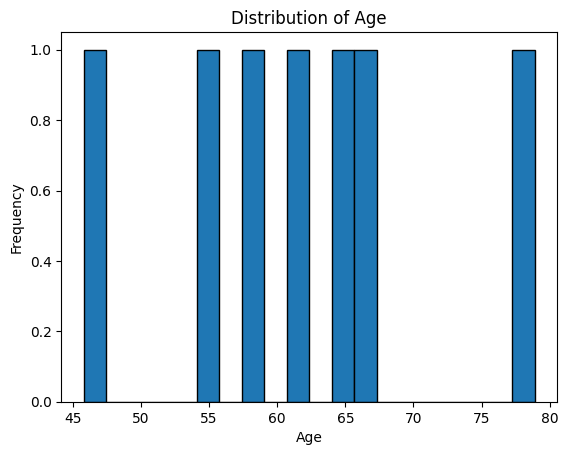

+----------------+
| chas_percentage|
+----------------+
|6.91699604743083|
+----------------+



In [16]:
import matplotlib.pyplot as plt

# Task 4.1: Histogram for the "age" column
age_data = dataset.select("age").rdd.flatMap(lambda x: x).collect()
plt.hist(age_data, bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Task 4.2: Percentage of properties near the Charles River
chas_percentage = spark.sql("""
    SELECT
        (SUM(CASE WHEN chas = 1 THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS chas_percentage
    FROM BostonH.bos_housing
""")
chas_percentage.show()


Task 5: Correlation Analysis

In [17]:
# Task 5.1: Correlation between "rm" and "medv"
rm_medv_corr = spark.sql("SELECT CORR(rm, medv) AS rm_medv_corr FROM BostonH.bos_housing")
rm_medv_corr.show()

# Task 5.2: Correlation between "ptratio" and "nox"
ptratio_nox_corr = spark.sql("SELECT CORR(ptratio, nox) AS ptratio_nox_corr FROM BostonH.bos_housing")
ptratio_nox_corr.show()


+------------------+
|      rm_medv_corr|
+------------------+
|0.6953599470715401|
+------------------+

+-------------------+
|   ptratio_nox_corr|
+-------------------+
|0.18893267711276893|
+-------------------+



Task 6:  Advanced Querying

In [18]:
# Task 6.1: Top 5 neighborhoods with highest median home values
top_5_neighborhoods = spark.sql("SELECT * FROM BostonH.bos_housing ORDER BY medv DESC LIMIT 5")
top_5_neighborhoods.show()

# Task 6.2: Average property age comparison
average_age_chas = spark.sql("""
    SELECT
        chas,
        AVG(age) AS average_age
    FROM BostonH.bos_housing
    GROUP BY chas
""")
average_age_chas.show()


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+

+----+-----------------+
|chas|      average_age|
+----+-----------------+
|   1|77.50000000000001|
|   0|67.91167728237794|
+----+-----------------+



Task 7: Visualization

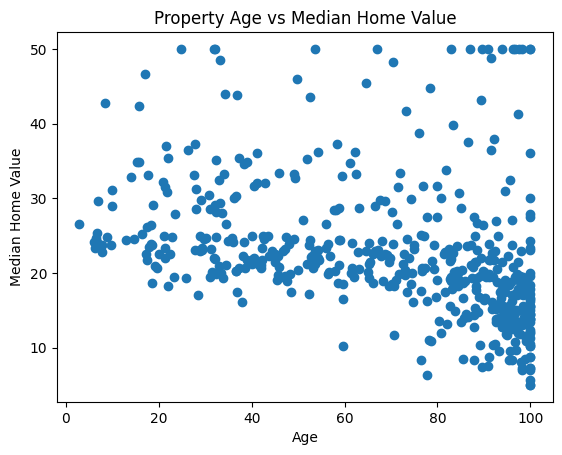

In [19]:
# Task 7.1: Create a Hive view
spark.sql("CREATE OR REPLACE VIEW BostonH.property_age_view AS SELECT age, medv FROM BostonH.bos_housing")

# Task 7.2: Scatter plot of property age vs median home value
property_age_view = spark.sql("SELECT * FROM BostonH.property_age_view")
property_age_data = property_age_view.collect()

ages = [row['age'] for row in property_age_data]
medvs = [row['medv'] for row in property_age_data]

plt.scatter(ages, medvs)
plt.title('Property Age vs Median Home Value')
plt.xlabel('Age')
plt.ylabel('Median Home Value')
plt.show()


Task 8: Outliers Detection

In [20]:
# Task 8.1: Properties with crim > 10
high_crim_properties = spark.sql("SELECT * FROM BostonH.bos_housing WHERE crim > 10")
high_crim_properties.show()


+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

Task 9:  Hypothesis Testing (20 minutes)

In [21]:
# Task 9: Hypothesis testing
# H0: There is no significant relationship between the number of rooms and the median home value.
# H1: There is a significant relationship between the number of rooms and the median home value.

from pyspark.sql.functions import mean, stddev, col

# Mean and standard deviation for rm and medv
rm_mean = dataset.select(mean(col('rm')).alias('mean_rm')).collect()[0]['mean_rm']
medv_mean = dataset.select(mean(col('medv')).alias('mean_medv')).collect()[0]['mean_medv']
rm_stddev = dataset.select(stddev(col('rm')).alias('stddev_rm')).collect()[0]['stddev_rm']
medv_stddev = dataset.select(stddev(col('medv')).alias('stddev_medv')).collect()[0]['stddev_medv']

# Calculating t-value for the correlation
rm_medv_corr = dataset.stat.corr('rm', 'medv')
n = dataset.count()
t_value = rm_medv_corr * (n - 2) ** 0.5 / (1 - rm_medv_corr ** 2) ** 0.5

# Assuming significance level alpha = 0.05, critical value for two-tailed test is around 1.96
alpha = 0.05
critical_value = 1.96

if abs(t_value) > critical_value:
    print(f"T-value: {t_value} > {critical_value}, reject H0. There is a significant relationship between 'rm' and 'medv'.")
else:
    print(f"T-value: {t_value} <= {critical_value}, fail to reject H0. There is no significant relationship between 'rm' and 'medv'.")


T-value: 4.357490243517717 > 1.96, reject H0. There is a significant relationship between 'rm' and 'medv'.
